## Z scores

Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:

In [1]:
import pandas as pd

houses = pd.read_table('data/AmesHousing_1.txt')

In [2]:
houses['SalePrice'].sample(1, random_state = 0)

2216    220000
Name: SalePrice, dtype: int64

We can see we got a price of $220,000. Is a house costing $220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether $220,000 is below or above the mean:

In [3]:
houses['SalePrice'].mean()

180796.0600682594

The sampled house ($220,000) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

To see why this is true, consider below two normally-distributed samples of sale prices (we made this simplifying assumption of normality for teaching purposes). Both samples have the same mean ¯x=180,000, but the sample standard deviations s are different (on the left, s=40,000, while on the right s=10,000). 

![Standard deviations](img/s2m5_different_sds.svg)

For the sample with a greater standard deviation (s=40000), we can see that $220,000 is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

For the other sample (s=10000), we see $220,000 on the far right of the distribution, indicating that houses at that price are uncommon and thus very expensive (relative to the other houses on the market).

Now let's try to figure out how far off from the mean a value of $220,000 is in the distribution of the SalePrice variable.

## Task 

+ Generate a kernel density plot for the SalePrice variable to find out how far off $220,000 is from the mean.
    + Generate the plot using `Series.plot.kde()`.
        + The limits of the x-axis should be the minimum and the maximum value of the SalePrice variable. To set the limits you can use the xlim parameter of `Series.plot.kde()`.
    + Plot a vertical line to indicate visually the location of the mean using `plt.axvline()`.
        + The color of the line should be black, and its label should be 'Mean'. You can use the color and label parameters of `plt.axvline()`.
    + Plot a vertical line to indicate visually the standard deviation distance above the mean — you'll have to generate a vertical line for the sum of the mean and standard deviation.
        + Assume that the data is a population and compute the standard deviation without using Bessel's correction.
        + The color of the line should be red and its label should be 'Standard deviation'.
    + Plot a vertical line for the $220,000 price.
        + The color of the line should be orange and its label should be '220000'.
    + Display all the labels using `plt.legend()`.

+ Examine the graph and figure out whether a price of $220,000 is very expensive. If it's very expensive, assign True to variable named very_expensive, otherwise assign False.


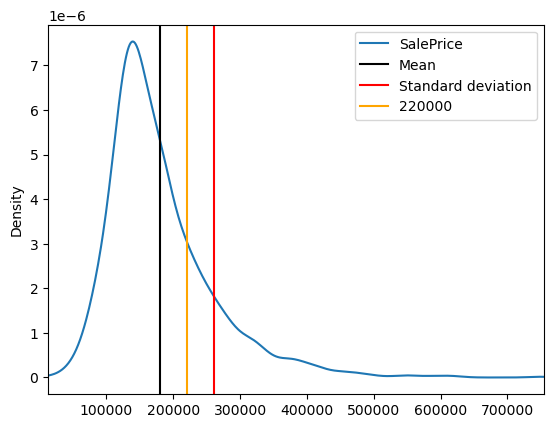

In [4]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()))

st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

very_expensive = False

### Number of Standard Deviations

A better to assess a point distance from the mean

#### Task

Find out the number of standard deviations away from the mean for a price of $220,000 in the distribution of the SalePrice variable.

+ Measure the distance between $220,000 and the mean of the SalePrice column.
+ Divide the distance by the standard deviation of the SalePrice column (assume the data we have is a population) to find the number of standard deviations away from the mean.
    + Assign your result to a variable named st_devs_away.
    + If you can't understand why we divide, think about this way: if we have a distance of 6 and a standard deviation of 2, then that is three standard deviations away because 6:2=3

+ Does the number of standard deviations match our visual estimate from the last exercise?

In [5]:
distance = 220000 - houses['SalePrice'].mean()
st_devs_away = distance / houses['SalePrice'].std(ddof = 0)

In [6]:
st_devs_away

0.4908280788718362

### Z scores definition

The value representing the number of standard deviations away from the mean is commonly known as the standard score, or the z-score.
It can either be negative or positive

Z score has two parts

+ The sign, which indicates whether the value is above or below the mean.
+ The value, which indicates the number of standard deviations that a value is away from the mean.


## Task

+ Write a function that takes in a value, the array the value belongs to, and returns the z-score of that value. Inside the function's definition:
    + Compute the mean of the array.
    + Compute the standard deviation of the array. Make sure your function is flexible enough to compute z-scores for both samples and populations.
        + You can use the `std()` function from numpy.
    + Find out the distance between the value and the mean of the array.
    + Compute the z-score by dividing the distance to the standard deviation of the array.
    + Return the z-score.

+ Compute the z-score for min_val, mean_val, max_val, which are already defined in the code editor. Assume that the values come from a population.
    + Assign the z-score for min_val to a variable named min_z.
    + Assign the z-score for mean_val to a variable named mean_z.
    + Assign the z-score for max_val to a variable named max_z.


In [7]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

### Locating Values in Different Distributions

+ Find out the location for which $200,000 has the z-score closest to 0. Code-wise, there are several ways to complete this task, and we encourage you to think of a way yourself. Below we describe one way to complete this task:

+ Isolate the data for each of the five neighborhoods. The neigborhoods are described in the Neighborhood column. These are the abbreviations for our neighborhoods of interest:
    + 'NAmes' for North Ames.
    + 'CollgCr' for College Creek.
    + 'OldTown' for Old Town.
    + 'Edwards' for Edwards.
    + 'Somerst' for Somerset.

+ For example, to isolate the data for North Ames you can do `houses[houses['Neighborhood'] == 'NAmes']` and save the data to a variable.
+ Find the z-score of a $200,000 price for each of the five data sets you isolated. Assume that each data set is a population.
+ Examine the z-scores to find the best location to invest in. Assign your answer as a string to the variable best_investment. Choose between the following strings: 'North Ames', 'College Creek', 'Old Town', 'Edwards', and 'Somerset'.


In [8]:
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Find the location with the z-score closest to 0
print(z_by_location)

{'NAmes': 1.7239665910370237, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': -0.5186390646965722}


In [9]:
best_investment = 'College Creek'

### Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores. Consider, for instance, the distribution of the SalePrice column:

<AxesSubplot:ylabel='Density'>

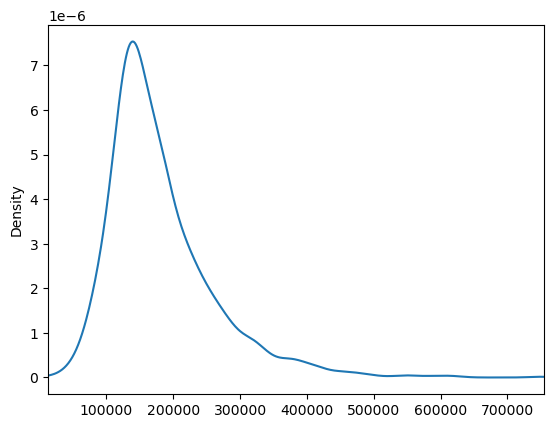

In [10]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()))

We can transform the entire distribution by converting each value to a z-score. In the next code block, we will:

+ Convert each value to a z-score by using the `Series.apply()` method.
+  Store the z-scores in a separate column named z_prices.
+ Plot side by side the kernel density plot for the original values and the kernel density plot for the z-scores.


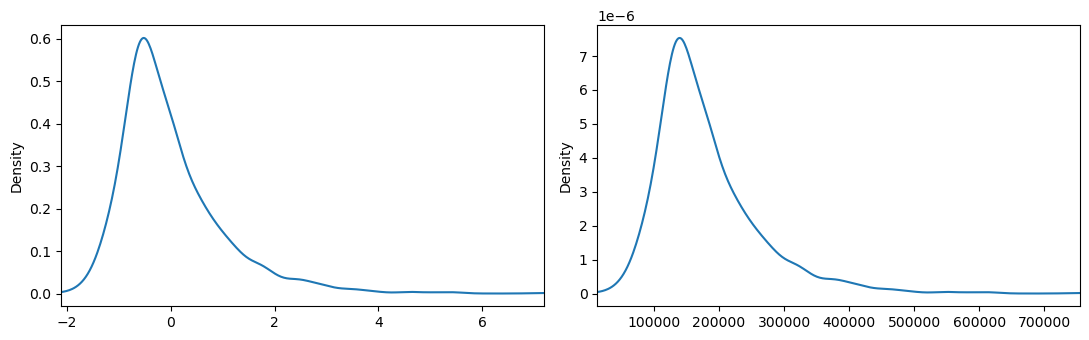

In [11]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev))

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                ))
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     ))
                                     
plt.tight_layout() # otherwise the plots will overlay partially

Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores. Now lets find the mean and standard deviation when values have been converted to z scores

### Task 

+ We've already transformed the distribution of the SalePrice variable to distribution of z-scores and saved the new values to a column named z_prices.
    + Compute the mean of the z_prices column and assign the result to a variable named z_mean_price.
    + Compute the standard deviation of the z_prices column and assign the result to a variable named z_stdev_price. Assume that you're computing the standard deviation for a population.

+ Transform the distribution of the Lot Area variable into a distribution of z-scores.
    + Compute the mean of the new distribution of z-scores and assign the result to a variable named z_mean_area.
    + Compute the standard deviation of the new distribution of z-scores and assign the result to a variable named z_stdev_area. Assume that you're computing the standard deviation for a population.

+ Compare the values of z_mean_price and z_mean_area. What do you observe? How can you explain that?

+ Compare the values of z_stdev_price and z_stdev_area. What do you observe? How can you explain that?


In [12]:
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)


In [13]:
# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_area) / stdev_area)
    )

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)

A distribution of z-scores is often called a standard distribution

## Task

+ Standardize the population of values stored in the population variable and compute its mean μz and its standard deviation σz.

+ Assign the value of μz to a variable named mean_z.
+ Assign the value of σz to a variable named stdev_z.
+ This time we should get μz=0 and σz=1 because there'll be no rounding errors.

In [15]:
from numpy import std, mean
population = [0,8,0,8]
mean_pop = mean(population)
stdev_pop = std(population, ddof = 0)

standardized_pop = []
for value in population:
    z = (value - mean_pop) / stdev_pop
    standardized_pop.append(z)
    
mean_z = mean(standardized_pop)
stdev_z = std(standardized_pop, ddof = 0)

### Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.